In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split

In [24]:
def preprocess_image(img,target_size=(256,256)):
    img = cv2.imread(img)
    img = cv2.resize(img,target_size)
    img = img.astype(np.float32) / 255.0
    
    return img

In [25]:
Data_dir = '../Datasets/rotten or not Dataset'
X_data = []
y_data = []
l = []
for label in os.listdir(Data_dir):
    dir = os.path.join(Data_dir,label)
    for img_file in os.listdir(dir):
        img_path = os.path.join(dir,img_file)
        img = preprocess_image(img_path)
        X_data.append(img)
        y_data.append(label)

X_data = np.array(X_data)
y_data = np.array(y_data)

In [53]:
print(X_data.shape)
print(y_data.shape)

(561, 256, 256, 3)
(561,)


In [27]:
shuffle_indices = np.random.permutation(len(X_data))
X_data = X_data[shuffle_indices]
y_data = y_data[shuffle_indices]


In [22]:
y_data

array(['rotten', 'rotten', 'fresh', 'fresh', 'rotten', 'rotten', 'fresh',
       'fresh', 'rotten', 'rotten', 'rotten', 'fresh', 'rotten', 'fresh',
       'rotten', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'rotten',
       'rotten', 'rotten', 'fresh', 'rotten', 'rotten', 'rotten', 'fresh',
       'fresh', 'fresh', 'fresh', 'fresh', 'rotten', 'fresh', 'rotten',
       'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'rotten',
       'fresh', 'fresh', 'rotten', 'fresh', 'fresh', 'rotten', 'fresh',
       'fresh', 'fresh', 'fresh', 'rotten', 'fresh', 'rotten', 'fresh',
       'rotten', 'fresh', 'fresh', 'rotten', 'fresh', 'rotten', 'rotten',
       'fresh', 'rotten', 'rotten', 'fresh', 'fresh', 'fresh', 'rotten',
       'rotten', 'rotten', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh',
       'fresh', 'fresh', 'fresh', 'rotten', 'rotten', 'fresh', 'fresh',
       'rotten', 'rotten', 'fresh', 'rotten', 'rotten', 'rotten', 'fresh',
       'fresh', 'fresh', 'rotten', 'fresh', 'fresh',

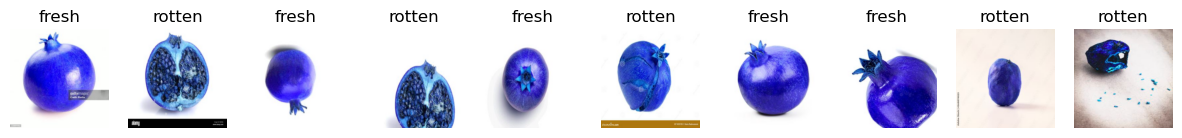

In [28]:
no_of_images = 10
fig,axes = plt.subplots(1,no_of_images,figsize=(15,8))
for i in range(no_of_images):
    axes[i].imshow(X_data[i])
    axes[i].axis('off')
    axes[i].set_title(y_data[i])

plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder

labels = ['Fresh','Rotten']
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)
y_data

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [49]:
#splitting data
X,X_test,y,y_test = train_test_split(X_data,y_data,test_size=0.2,random_state=42)

In [50]:
#splittind training data into train and validation
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
print(f'x_train:{X_train.shape}')
print(f'x_val:{X_val.shape}')
print(f'x_test:{X_test.shape}')


x_train:(358, 256, 256, 3)
x_val:(90, 256, 256, 3)
x_test:(113, 256, 256, 3)


In [42]:
# Building model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.activations import relu,softmax,sigmoid
from keras.optimizers import Adam

input_shape = (256,256,3)
no_of_classes = 2

model = Sequential()
model.add(Flatten(input_shape = input_shape))
model.add(Dense(512,activation=relu))
model.add(Dropout(0.5))
model.add(Dense(256,activation=relu))
model.add(Dropout(0.5))
model.add(Dense(2,activation=sigmoid))

In [54]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [55]:
model.fit(X_train,y_train,
          epochs=10,
          batch_size=32,
          validation_data=(X_val,y_val)
          )

Epoch 1/10



12/12 [==============================] - 19s 1s/step - loss: 139.2658 - accuracy: 0.5056 - val_loss: 60.3974 - val_accuracy: 0.4778
Epoch 2/10
12/12 [==============================] - 16s 1s/step - loss: 119.2856 - accuracy: 0.5196 - val_loss: 51.1597 - val_accuracy: 0.5222
Epoch 3/10
10/12 [========================>.....] - ETA: 2s - loss: 30742938562731090907070556224356352.0000 - accuracy: 0.4906